**Supervised algorithms**

A supervised algorithm is a type of machine learning algorithm that is trained on labeled data. In supervised learning, the model learns from input-output pairs, where the input is the feature set and the output is the corresponding label or target variable. The goal is for the model to learn the mapping from inputs to outputs so it can accurately predict the output for new, unseen inputs.

There are two main types of supervised learning tasks:

**Classification**: When the output variable is a category, such as 'spam' or 'not spam', 'disease' or 'no disease'.

**Regression**: When the output variable is a continuous value, such as predicting house prices or stock prices.

In [1]:
## Importing Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')


**Classification**

For this assignment, we will demonstrate the use of supervised learning and classification techniques. The dataset includes various medical predictor variables, such as the number of pregnancies, BMI, insulin level, and age, along with a target variable, Outcome. By applying a classification algorithm to this dataset, we aim to develop two classification models that can accurately predict the occurance of diabetes based on the provided medical indicators in female patients. This exercise will showcase the practical application of supervised learning in the context of medical data analysis.

In [2]:
# Read data
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Exploratory Data Analysis**

In [3]:
# Display Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Summarize Data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


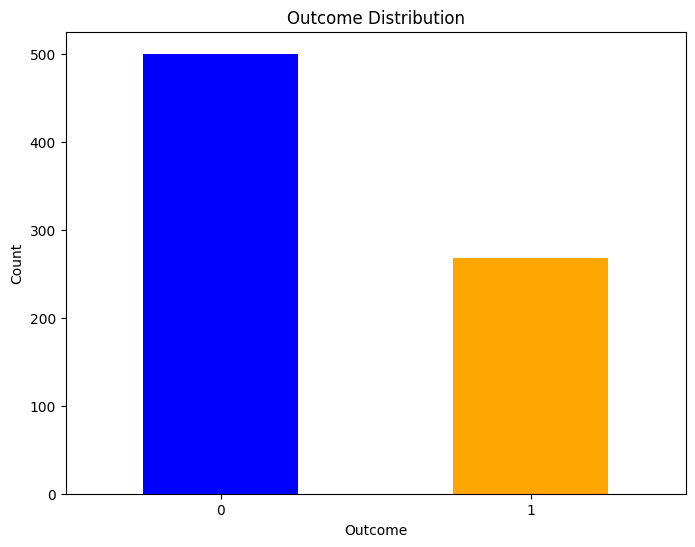

In [5]:
# Understanding the outcome distribution
outcome_counts = df['Outcome'].value_counts()

# Plotting the value counts
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Clearly there is a imbalance in the data with respect to outcome. We will have to employ some balancing technique to addess the issue.

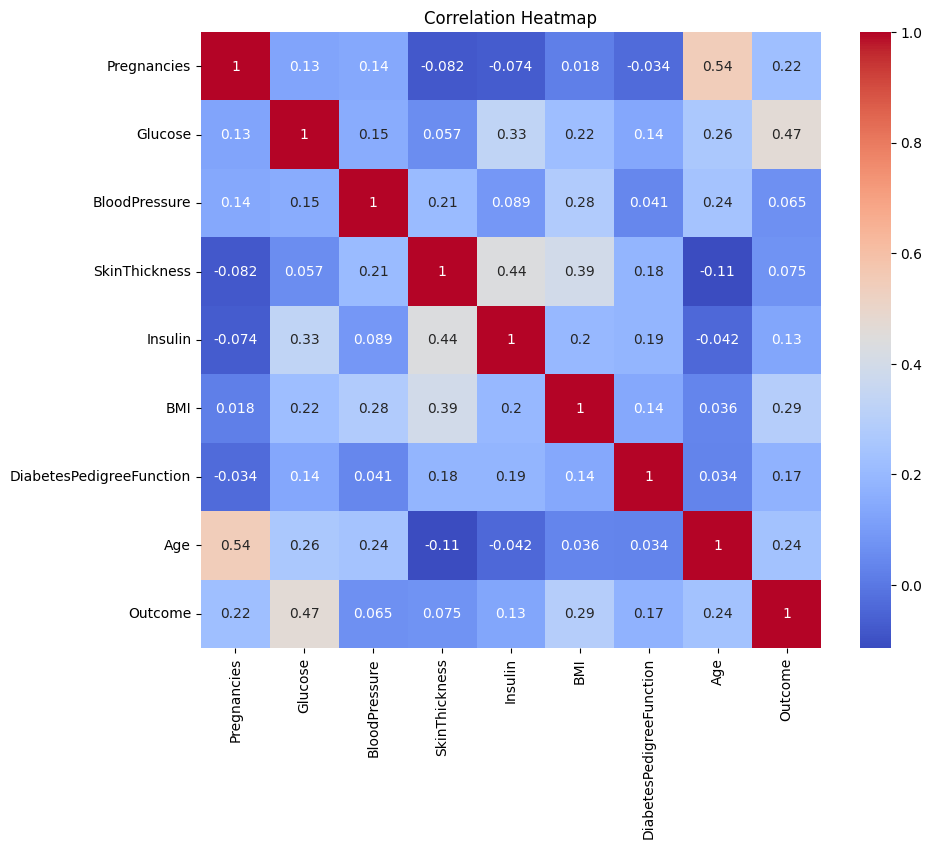

In [6]:
# Correlation Analysis
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The correlation analysis shows that the Outcome column has the highest correlation with the Glucose column, with a correlation score of 0.47. This indicates a moderate positive relationship between glucose levels and diabetes outcomes, suggesting that higher glucose levels are associated with an increased likelihood of diabetes.

Conversely, the Outcome column has the lowest correlation with the SkinThickness column, with a correlation score of 0.075. This indicates a very weak relationship between skin thickness and diabetes outcomes, suggesting that skin thickness is not a significant predictor of diabetes in this dataset.

**Data Cleaning And Feature Engineering**

In [7]:
# Dropping column:SkinThickness based on correlation analysis
df.drop(columns=['SkinThickness'], inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1




In our dataset, a value of 0 in the columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age' indicates missing data rather than a valid measurement. To handle this, we first replaced all 0 values in these columns with NaN. Subsequently, we imputed these NaN values with the median of each respective column. This approach ensures that missing data is appropriately managed, allowing for more accurate and robust analysis.


In [8]:
# Replace 0 values with NaN in specific columns
cols_to_check = ['Glucose', 'BloodPressure','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df[cols_to_check] = df[cols_to_check].replace(0, np.NaN)

## Count the number of NaN
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
# Impute NaN values with median of each column
imputer = SimpleImputer(strategy='median')
df[cols_to_check] = imputer.fit_transform(df[cols_to_check])
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,125.0,33.6,0.627,50.0,1
1,1,85.0,66.0,125.0,26.6,0.351,31.0,0
2,8,183.0,64.0,125.0,23.3,0.672,32.0,1
3,1,89.0,66.0,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,168.0,43.1,2.288,33.0,1


In [10]:
## Count the number of NaN
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Separate the features and target
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the feature set
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame (optional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features with the target
df_scaled = pd.concat([X_scaled_df, y], axis=1)


df_scaled.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.133413,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.133413,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.133413,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.185096,0.509202,0.943638,0.200000,1


In [12]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled_df, y)

# Convert arrays back to DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)

# Concatenate the resampled features with the target
df_resampled = pd.concat([X_resampled_df, y_resampled], axis=1)

# Check the balanced DataFrame
print(df_resampled['Outcome'].value_counts())

Outcome
1    500
0    500
Name: count, dtype: int64


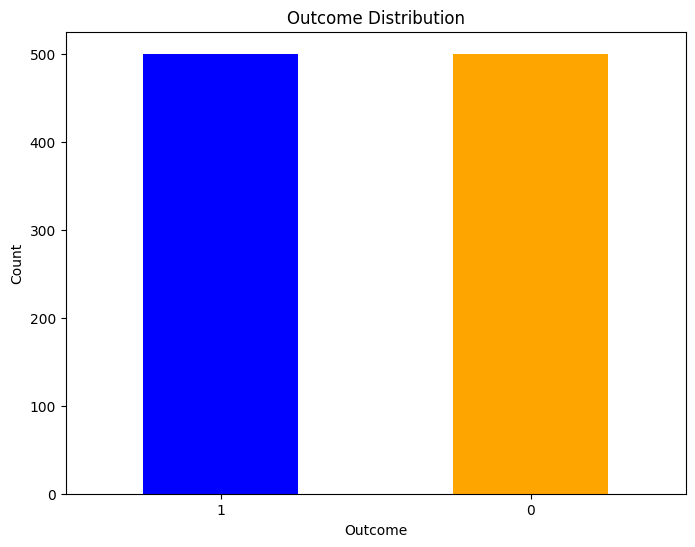

In [13]:
# Plotting the value counts
outcome_counts = df_resampled['Outcome'].value_counts()
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Spliting the data into test and train

The data will be split in the ratio of 80:20 of taining and testing

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Print shapes to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 7) (800,)
Testing set shape: (200, 7) (200,)


**Build Model**

In [15]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search
param_grid_rf = {
    'n_estimators': [100, 130, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15, 20, None],
    'max_features': [0.5, 0.75, 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters for Random Forest Classifier:")
print(grid_search_rf.best_params_)
print()



Best parameters for Random Forest Classifier:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}



In [16]:
# Get the best estimator
rf_classifier_best = grid_search_rf.best_estimator_

# Predict on the test data
y_pred_rf = rf_classifier_best.predict(X_test)

# Print classification report
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print accuracy score
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier - Accuracy: {rf_accuracy:.4f}")

Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       105
           1       0.81      0.89      0.85        95

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.85      0.85      0.85       200

Random Forest Classifier - Accuracy: 0.8500


Random Forest Classifier - Confusion Matrix:


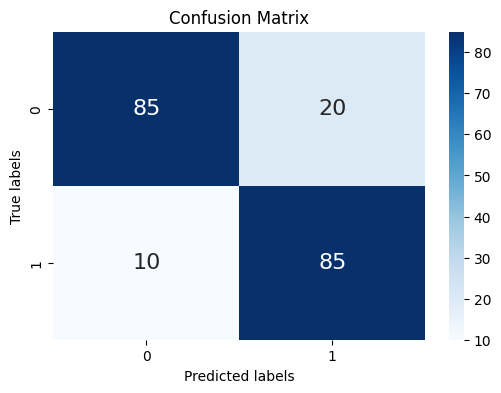

In [17]:
# Print confusion matrix
print("Random Forest Classifier - Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Based on the aforementioned classification report and confusion matrix for the Random Forest Classifier, here's an analysis of the model's performance:

### Classification Report:
- **Precision:** Precision measures the accuracy of positive predictions.
  - For class 0 (non-diabetes), precision is 0.89, indicating that when the model predicts non-diabetes, it is correct 89% of the time.
  - For class 1 (diabetes), precision is 0.81, meaning that when the model predicts diabetes, it is correct 81% of the time.
  
- **Recall:** Recall measures the ability of the model to correctly identify true positives.
  - For class 0, recall is 0.81, indicating that the model correctly identifies 81% of actual non-diabetes cases.
  - For class 1, recall is 0.89, meaning that the model correctly identifies 89% of actual diabetes cases.
  
- **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a single metric to evaluate a model's performance. It balances both precision and recall.
  - The weighted average F1-score for class 0 is 0.85, and for class 1 is also 0.85, indicating good overall performance in both classes.
  
- **Accuracy:** The overall accuracy of the model is 0.8500, or 85.0%. This represents the percentage of correctly predicted outcomes (both true positives and true negatives) out of all predictions.

### Confusion Matrix:
The confusion matrix provides a detailed breakdown of predictions versus actual outcomes:

- **True Positives (TP):** 85 (predicted diabetes correctly)
- **True Negatives (TN):** 85 (predicted non-diabetes correctly)
- **False Positives (FP):** 20 (predicted diabetes incorrectly)
- **False Negatives (FN):** 10 (predicted non-diabetes incorrectly)

### Interpretation:
- The model correctly predicted diabetes (class 1) 85 out of 95 times, and correctly predicted non-diabetes (class 0) 85 out of 105 times.
- It incorrectly predicted diabetes 20 times when the actual outcome was non-diabetes (false positives), and incorrectly predicted non-diabetes 10 times when the actual outcome was diabetes (false negatives).

### Comparison with Decision Tree Classifier:
- **Accuracy:** The Random Forest Classifier achieved an accuracy of 85.0%, which is higher than the Decision Tree Classifier's accuracy of 79.5%. This indicates that the ensemble approach of Random Forests has improved the predictive performance.
  
- **Precision and Recall:** Both precision and recall scores are higher for both classes in the Random Forest Classifier compared to the Decision Tree Classifier. This suggests that the Random Forest Classifier is better at distinguishing between diabetes and non-diabetes cases.
  
### Conclusion:
The Random Forest Classifier demonstrates superior performance compared to the Decision Tree Classifier in terms of accuracy, precision, recall, and F1-score. It effectively identifies patterns in the dataset and makes more accurate predictions for diabetes outcomes based on the medical predictor variables. This makes it a preferred choice for practical deployment in predicting diabetes in female patients based on the given medical indicators. However, we can further improve scores by further model tuning and model selection.

In [21]:
# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# hyperparameter tuning of dt_classifier
param_grid_dt = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['sqrt','log2']
}
# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters for Decision Tree Classifier:")
print(grid_search_dt.best_params_)
print()


Best parameters for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}



In [22]:
# Get the best estimator
dt_classifier_best = grid_search_dt.best_estimator_

# Predict on the test data
y_pred_dt = dt_classifier_best.predict(X_test)

# Print classification report
print("Decision Tree Classifier - Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Print accuracy score
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier - Accuracy: {dt_accuracy:.4f}")

Decision Tree Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.80       105
           1       0.76      0.83      0.79        95

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.80       200

Decision Tree Classifier - Accuracy: 0.7950


Decision Tree Classifier - Confusion Matrix:


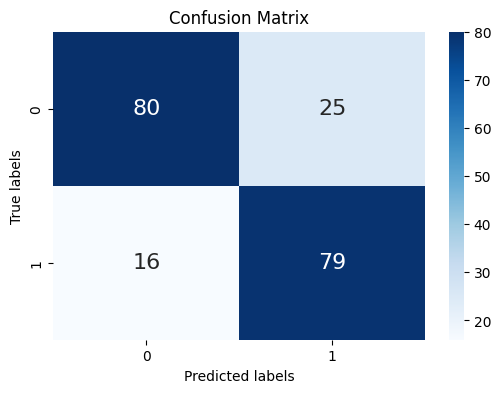

In [23]:
# Print confusion matrix
print("Decision Tree Classifier - Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Based on the classification report and confusion matrix for the Decision Tree Classifier, here's a breakdown of the model's performance:

### Classification Report:
- **Precision:** Precision measures the accuracy of positive predictions. For class 0 (non-diabetes), it is 0.83, indicating that when the model predicts non-diabetes, it is correct 83% of the time. For class 1 (diabetes), precision is 0.76, meaning that when the model predicts diabetes, it is correct 76% of the time.
  
- **Recall:** Recall measures the ability of the model to correctly identify true positives. For class 0, recall is 0.76, indicating that the model correctly identifies 76% of actual non-diabetes cases. For class 1, recall is 0.83, meaning that the model correctly identifies 83% of actual diabetes cases.
  
- **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a single metric to evaluate a model's performance. It balances both precision and recall. The weighted average F1-score for class 0 is 0.80, and for class 1 is 0.79.
  
- **Accuracy:** The overall accuracy of the model is 0.7950, or 79.5%. This represents the percentage of correctly predicted outcomes (both true positives and true negatives) out of all predictions.

### Confusion Matrix:
The confusion matrix provides a detailed breakdown of predictions versus actual outcomes:

- **True Positives (TP):** 79 (predicted diabetes correctly)
- **True Negatives (TN):** 80 (predicted non-diabetes correctly)
- **False Positives (FP):** 25 (predicted diabetes incorrectly)
- **False Negatives (FN):** 16 (predicted non-diabetes incorrectly)

### Interpretation:
- The model correctly predicted diabetes (class 1) 79 out of 95 times, and correctly predicted non-diabetes (class 0) 80 out of 105 times.
- It incorrectly predicted diabetes 25 times when the actual outcome was non-diabetes (false positives), and incorrectly predicted non-diabetes 16 times when the actual outcome was diabetes (false negatives).

### Conclusion:
The Decision Tree Classifier shows balanced performance with respect to precision, recall, and F1-score for both classes, indicating that it can effectively distinguish between diabetes and non-diabetes cases in the dataset. However, its accuracy of 79.5% suggests there is room for improvement, possibly through further model tuning or exploring alternative algorithms like SVC,Logistic Regression Classifier etc, which might enhance predictive performance.

Text(0.5, 0, 'Models')

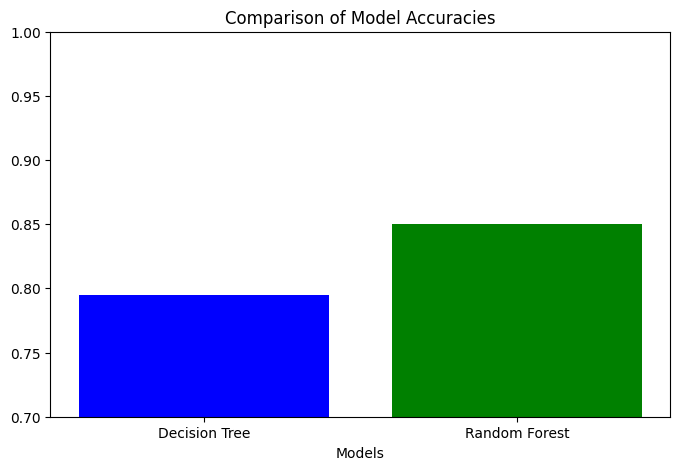

In [25]:
# Data for plotting
models = ['Decision Tree', 'Random Forest']
accuracies = [dt_accuracy, rf_accuracy]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim([0.7, 1.0])
plt.title('Comparison of Model Accuracies')
plt.xlabel('Models')

### Analysis and Comparison:
1. **Accuracy:** The Random Forest Classifier outperforms the Decision Tree Classifier with an accuracy of 85.0% compared to 79.5%. This indicates that the ensemble approach of Random Forests, which aggregates multiple decision trees, leads to better overall performance.

2. **Precision and Recall:**
   - Both models show balanced precision and recall scores, indicating they can effectively distinguish between diabetes and non-diabetes cases.
   - The Random Forest Classifier generally exhibits slightly higher precision and recall for both classes, suggesting it makes fewer false predictions and correctly identifies more true positives.

3. **F1-score:**
   - The Random Forest Classifier also achieves a higher weighted average F1-score (around 0.85) compared to the Decision Tree Classifier (around 0.80). This metric considers both precision and recall, providing a comprehensive measure of a model's performance.

4. **Model Complexity and Interpretability:**
   - **Decision Tree Classifier:** Offers better interpretability of individual decision rules but is prone to overfitting, especially with deeper trees.
   - **Random Forest Classifier:** Combines multiple decision trees, reducing overfitting and improving generalization, though at the cost of interpretability of individual trees.

### Conclusion:
- **Best Model Choice:** Based on the analysis, the **Random Forest Classifier** is the preferred model for predicting diabetes in female patients based on the provided medical indicators. It offers higher accuracy, precision, recall, and F1-score compared to the Decision Tree Classifier.
  
- **Further Considerations:** For scenarios where interpretability of individual decision rules is critical, the Decision Tree Classifier might still be considered. However, given the dataset's size and complexity, the Random Forest Classifier provides a good balance between predictive power and interpretability.